# Exploring Relationships Part 1

### This script contains the following points:
1. Importing libraries
2. Importing data
3. Making changes to column for improved analysis
4. Exploring relationships
    * Correlations
    * Scatterplots
    * Pair plots

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

### 2. Importing data

In [3]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [4]:
df_natality = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'natality_concat.pkl'))

In [5]:
df_natality.head()

,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
0,Alabama,2019,January,1,8th grade or less,No prenatal care,34,3223.149902,27.440001,38.820000,2019-01-01
1,Alabama,2019,January,1,8th grade or less,2nd month,30,3482.770020,29.930000,39.070000,2019-01-01
2,Alabama,2019,January,1,8th grade or less,3rd month,25,3251.959961,30.760000,38.639999,2019-01-01
3,Alabama,2019,January,1,8th grade or less,4th month,25,3120.399902,28.639999,38.119999,2019-01-01
4,Alabama,2019,January,1,8th grade or less,5th month,12,2938.080078,27.920000,37.500000,2019-01-01


In [6]:
df_natality.tail()

,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
28650,Wyoming,2021,December,12,bachelor's degree,2nd month,56,3292.620117,29.020000,38.750000,2021-12-01
28651,Wyoming,2021,December,12,bachelor's degree,3rd month,29,3372.899902,32.279999,38.480000,2021-12-01
28652,Wyoming,2021,December,12,bachelor's degree,4th month,11,3488.639893,34.730000,38.730000,2021-12-01
28653,Wyoming,2021,December,12,master's degree,2nd month,22,3173.050049,32.680000,38.270000,2021-12-01
28654,Wyoming,2021,December,12,master's degree,3rd month,15,3091.070068,33.330002,38.470001,2021-12-01


In [7]:
df_natality.shape

(86437, 11)

### 3. Making changes to column for improved analysis

In [8]:
# Turning prenatal start month into a number, so the data can be properly explored. Here, we start with turning
# unknown prenatal care start months into NULL values, then filling them with the mean of prenatal start months based on
# state, year, and mother's education. 

df_natality.loc[df_natality['prenatal_start'] == "Unknown or Not Stated", 'prenatal_start'] = ""

In [9]:
pd.options.display.max_rows = None

In [10]:
df_natality.loc[df_natality['prenatal_start'] == "No prenatal care", 'prenatal_start'] = 0
df_natality.loc[df_natality['prenatal_start'] == "1st month", 'prenatal_start'] = 1
df_natality.loc[df_natality['prenatal_start'] == "2nd month", 'prenatal_start'] = 2
df_natality.loc[df_natality['prenatal_start'] == "3rd month", 'prenatal_start'] = 3
df_natality.loc[df_natality['prenatal_start'] == "4th month", 'prenatal_start'] = 4
df_natality.loc[df_natality['prenatal_start'] == "5th month", 'prenatal_start'] = 5
df_natality.loc[df_natality['prenatal_start'] == "6th month", 'prenatal_start'] = 6
df_natality.loc[df_natality['prenatal_start'] == "7th month", 'prenatal_start'] = 7
df_natality.loc[df_natality['prenatal_start'] == "8th month", 'prenatal_start'] = 8
df_natality.loc[df_natality['prenatal_start'] == "9th month", 'prenatal_start'] = 9


In [11]:
df_natality.head()

,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
0,Alabama,2019,January,1,8th grade or less,0,34,3223.149902,27.440001,38.820000,2019-01-01
1,Alabama,2019,January,1,8th grade or less,2,30,3482.770020,29.930000,39.070000,2019-01-01
2,Alabama,2019,January,1,8th grade or less,3,25,3251.959961,30.760000,38.639999,2019-01-01
3,Alabama,2019,January,1,8th grade or less,4,25,3120.399902,28.639999,38.119999,2019-01-01
4,Alabama,2019,January,1,8th grade or less,5,12,2938.080078,27.920000,37.500000,2019-01-01


In [12]:
# Creating nulls or NaN in place of "" or where previously "Unknown or Not Stated" values were under prenatal_start.

df_natality['prenatal_start'] = pd.to_numeric(df_natality['prenatal_start'], errors='coerce')

In [13]:
df_natality['prenatal_start'].isnull().sum()

5200

In [14]:
# Here, the bulk of the prenatal start month nulls were replaced with the mean for the corresponding state, year, month,
# and mother education level associated with each record.

df_natality['prenatal_start'] = df_natality.groupby(['state','year','month','mother_ed'], sort=False)['prenatal_start'].apply(lambda x: x.fillna(x.mean()))

In [15]:
df_natality['prenatal_start'].isnull().sum()

6

In [16]:
# Looking at remaining nulls.

df_natality_nan = df_natality[df_natality['prenatal_start'].isnull() == True]
df_natality_nan.head(6)


,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
1658,Arizona,2019,December,12,Unknown or Not Stated,NaN,10,2624.399902,29.200001,36.599998,2019-12-01
23753,South Carolina,2019,November,11,Unknown or Not Stated,NaN,17,3212.350098,28.290001,37.939999,2019-11-01
23803,South Carolina,2019,December,12,Unknown or Not Stated,NaN,22,3115.320068,29.639999,38.090000,2019-12-01
24433,Tennessee,2019,June,6,Unknown or Not Stated,NaN,17,3601.000000,23.709999,38.169998,2019-06-01
5785,Georgia,2020,February,2,Unknown or Not Stated,NaN,18,3249.669922,30.110001,38.439999,2020-02-01
5853,Georgia,2020,March,3,Unknown or Not Stated,NaN,12,3293.250000,30.000000,38.250000,2020-03-01


In [17]:
# Here, the 6 remaining nulls prenatal start month nulls were replaced with the mean for the corresponding year
# associated with each record.

df_natality['prenatal_start'] = df_natality.groupby(['year'], sort=False)['prenatal_start'].apply(lambda x: x.fillna(x.mean()))

In [18]:
df_natality.head()

,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
0,Alabama,2019,January,1,8th grade or less,0.0,34,3223.149902,27.440001,38.820000,2019-01-01
1,Alabama,2019,January,1,8th grade or less,2.0,30,3482.770020,29.930000,39.070000,2019-01-01
2,Alabama,2019,January,1,8th grade or less,3.0,25,3251.959961,30.760000,38.639999,2019-01-01
3,Alabama,2019,January,1,8th grade or less,4.0,25,3120.399902,28.639999,38.119999,2019-01-01
4,Alabama,2019,January,1,8th grade or less,5.0,12,2938.080078,27.920000,37.500000,2019-01-01


In [19]:
df_natality['prenatal_start'].isnull().sum()

0

In [20]:
df_natality['prenatal_start']=df_natality['prenatal_start'].astype('int32')

In [21]:
df_natality.dtypes

state                     object
year                       int16
month                     object
month_code                 int16
mother_ed                 object
prenatal_start             int32
births                     int32
birth_wt_avg             float32
mother_age_avg           float32
gest_age_avg             float32
date              datetime64[ns]
dtype: object

In [22]:
df_natality.head()

,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date
0,Alabama,2019,January,1,8th grade or less,0,34,3223.149902,27.440001,38.820000,2019-01-01
1,Alabama,2019,January,1,8th grade or less,2,30,3482.770020,29.930000,39.070000,2019-01-01
2,Alabama,2019,January,1,8th grade or less,3,25,3251.959961,30.760000,38.639999,2019-01-01
3,Alabama,2019,January,1,8th grade or less,4,25,3120.399902,28.639999,38.119999,2019-01-01
4,Alabama,2019,January,1,8th grade or less,5,12,2938.080078,27.920000,37.500000,2019-01-01


In [23]:
df_natality.columns

Index(['state', 'year', 'month', 'month_code', 'mother_ed', 'prenatal_start',
       'births', 'birth_wt_avg', 'mother_age_avg', 'gest_age_avg', 'date'],
      dtype='object')

In [24]:
sub = df_natality[['prenatal_start','births','birth_wt_avg','mother_age_avg','gest_age_avg']]

In [25]:
sub.head()

,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg
0,0,34,3223.149902,27.440001,38.820000
1,2,30,3482.770020,29.930000,39.070000
2,3,25,3251.959961,30.760000,38.639999
3,4,25,3120.399902,28.639999,38.119999
4,5,12,2938.080078,27.920000,37.500000


In [26]:
sub.corr()

,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg
prenatal_start,1.000000,-0.194109,0.168828,-0.160804,0.111981
births,-0.194109,1.000000,0.100460,0.036733,0.090671
birth_wt_avg,0.168828,0.100460,1.000000,0.313405,0.694863
mother_age_avg,-0.160804,0.036733,0.313405,1.000000,0.184262
gest_age_avg,0.111981,0.090671,0.694863,0.184262,1.000000


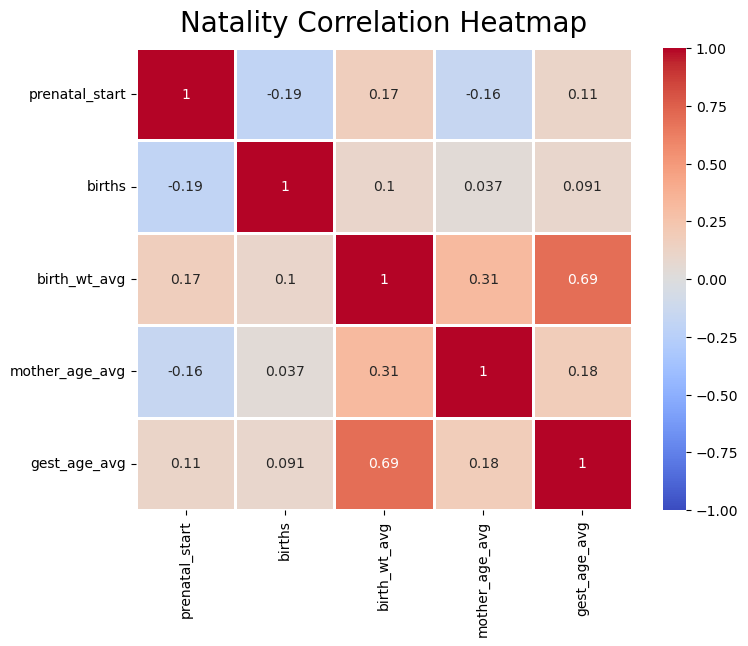

In [30]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(sub.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linecolor='white',linewidths=1)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Natality Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [31]:
heatmap.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_gen.png'), bbox_inches='tight')

#### The correlations here range from no correlation to positive correlations. No negative correlations exist. 
* Weak correlation between the mother age and gestational age (how long the mother carries the infant before delivery).
* Weak to moderate positive correlation between mother age and average birth weight. 
* Weak positive correlations between prenatal care start month (month of gestation prenatal care started) and birth weight and gestational age, meaning the later prenatal care started, the longer the gestational age and birth weight. 
* Weak negative correlations between prenatal care start month and mother age and births, meaning the earlier prenatal care started, the older the mother tended to be. Also, earlier prenatal care started, the higher the number of births in that category.
* Strong correlation between gestational age and birth weight average, with goes without saying, an infant's birth weight is likely to be greater the longer the mother carries the infant.

Text(33.37500000000001, 0.5, 'Average Gestational Age')

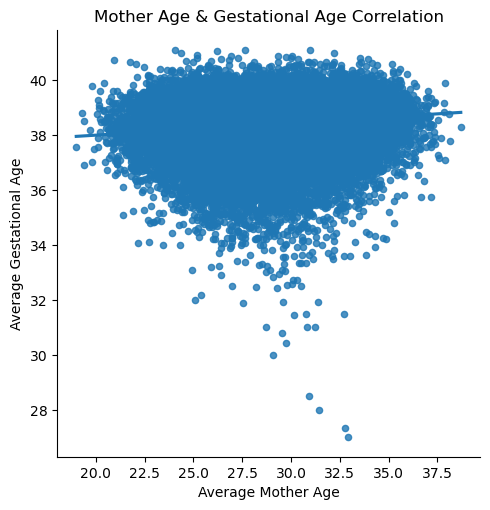

In [63]:
# Create a scatterplot mother age and gestational age.

corr_age_gest = sns.lmplot(x="mother_age_avg", y="gest_age_avg", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Mother Age & Gestational Age Correlation', fontsize=12)
plt.xlabel('Average Mother Age')
plt.ylabel('Average Gestational Age')

In [64]:
corr_age_gest.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_age_gest.png'), bbox_inches='tight')

Text(15.765625000000009, 0.5, 'Average Birth Weight')

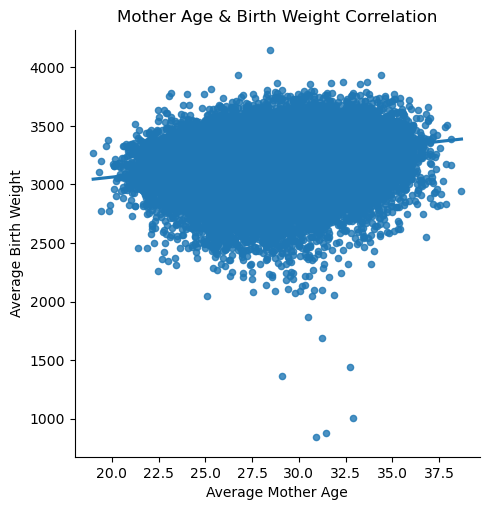

In [76]:
corr_age_wt = sns.lmplot(x="mother_age_avg", y="birth_wt_avg", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Mother Age & Birth Weight Correlation', fontsize=12)
plt.xlabel('Average Mother Age')
plt.ylabel('Average Birth Weight')

In [77]:
corr_age_wt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_age_wt.png'), bbox_inches='tight')

Text(15.765625000000009, 0.5, 'Average Birth Weight')

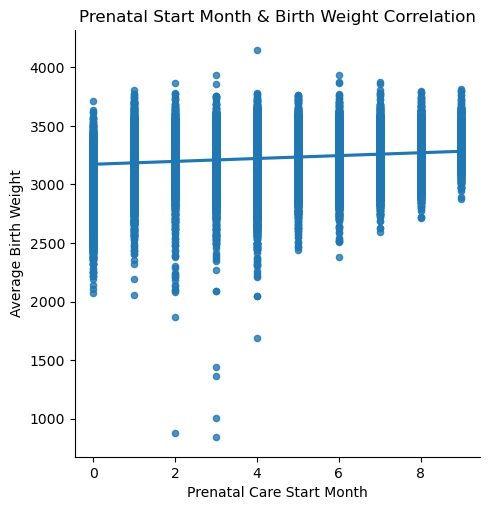

In [65]:
corr_prenatal_wt = sns.lmplot(x="prenatal_start", y="birth_wt_avg", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Prenatal Start Month & Birth Weight Correlation', fontsize=12)
plt.xlabel('Prenatal Care Start Month')
plt.ylabel('Average Birth Weight')

In [66]:
corr_prenatal_wt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_prenatal_wt.png'), bbox_inches='tight')

Text(33.37500000000001, 0.5, 'Average Gestational Age')

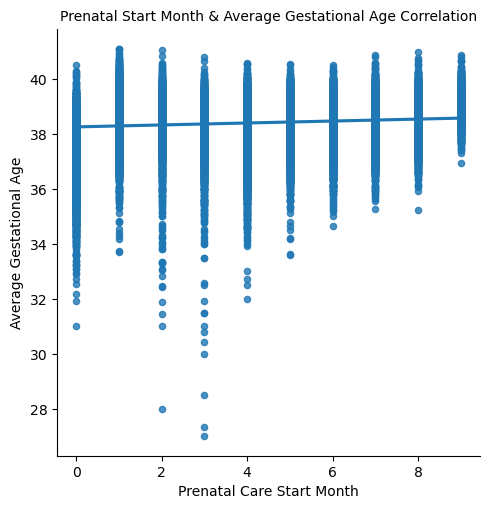

In [69]:
corr_prenatal_gest = sns.lmplot(x="prenatal_start", y="gest_age_avg", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Prenatal Start Month & Average Gestational Age Correlation', fontsize=10)
plt.xlabel('Prenatal Care Start Month')
plt.ylabel('Average Gestational Age')

In [70]:
corr_prenatal_gest.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_prenatal_gest.png'), bbox_inches='tight')

Text(42.39062500000001, 0.5, 'Average Mother Age')

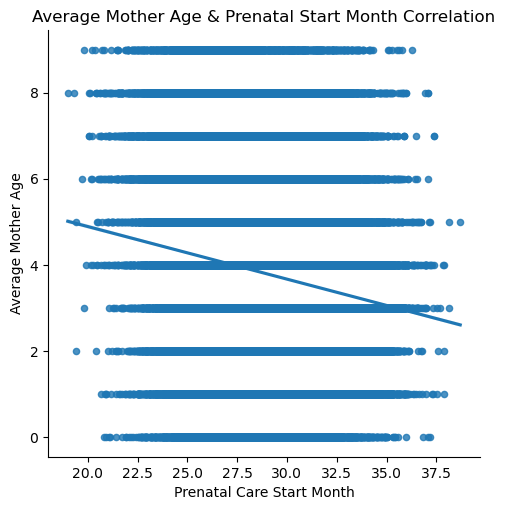

In [71]:
corr_prenatal_age = sns.lmplot(x="mother_age_avg", y="prenatal_start", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Average Mother Age & Prenatal Start Month Correlation', fontsize=12)
plt.xlabel('Prenatal Care Start Month')
plt.ylabel('Average Mother Age')

In [72]:
corr_prenatal_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_prenatal_age.png'), bbox_inches='tight')

Text(15.625000000000009, 0.5, 'Number of Births')

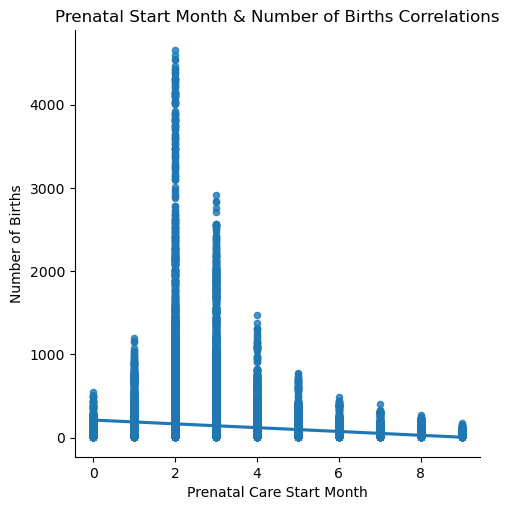

In [73]:
corr_prenatal_births = sns.lmplot(x="prenatal_start", y="births", data=sub, markers=['o'], scatter_kws={'s':20})
plt.title('Prenatal Start Month & Number of Births Correlations', fontsize=12)
plt.xlabel('Prenatal Care Start Month')
plt.ylabel('Number of Births')

In [74]:
corr_prenatal_births.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_prenatal_births.png'), bbox_inches='tight')

#### Here, only gestational age and average birth weight have a linear relationship. The longer an infant is carried, the greater the birth weight of that infant. 

#### Although the other two correlated variable pairs are correlated, there are unlikely linear. For example, the average birth weight for a record (which includes an average of birth weights organized by state, year, month, mother's education level, and prenatal care start month) seems to have groups of women giving birth prematurely in their early 30s. More exploration is needed to uncover this complex relationship. 

#### For mother's age and birth weight, the same phenomenon is experienced as above, with more women in their early 30s giving birth to lower birth weight babies. Is there more variation in gestational age and birth weight because more women in this age range are having more babies, or is there a more complex factor between mother's age and gestational age and birth weight?

#### The correlations between prenatal care start month and birth weight, gestational age, mother age, and number of births can be interpreted having the correlations described previously under the heatmap. However, given the pattern of the scatterplot, it is likely best to interpret these categorically. 



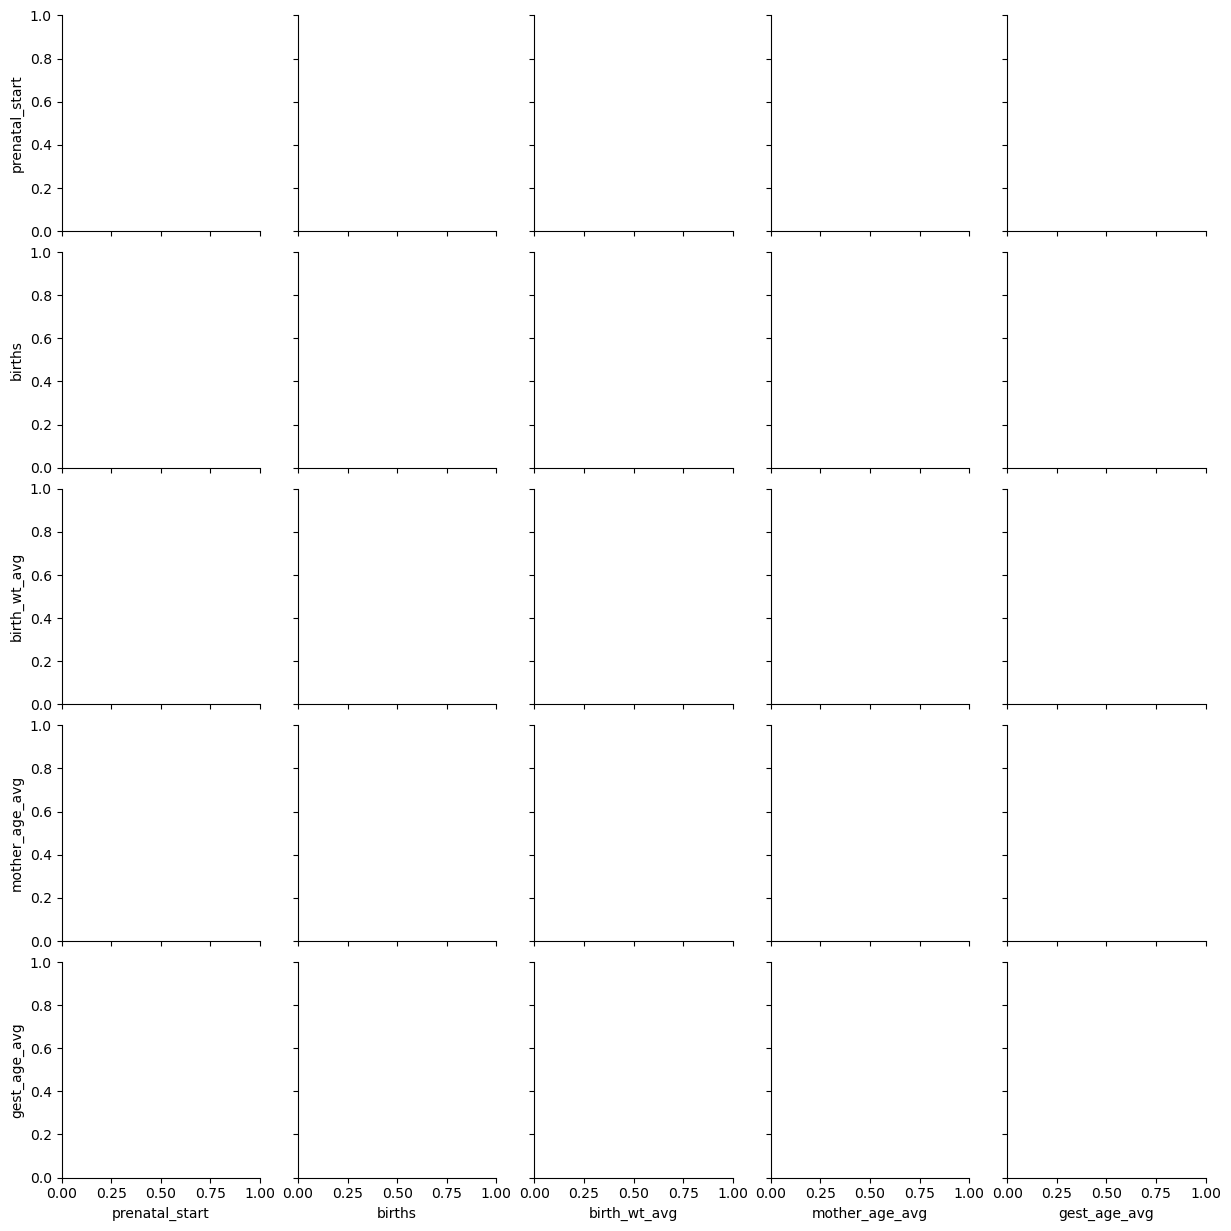

In [67]:
# Just the Grid
sns.PairGrid(sub)

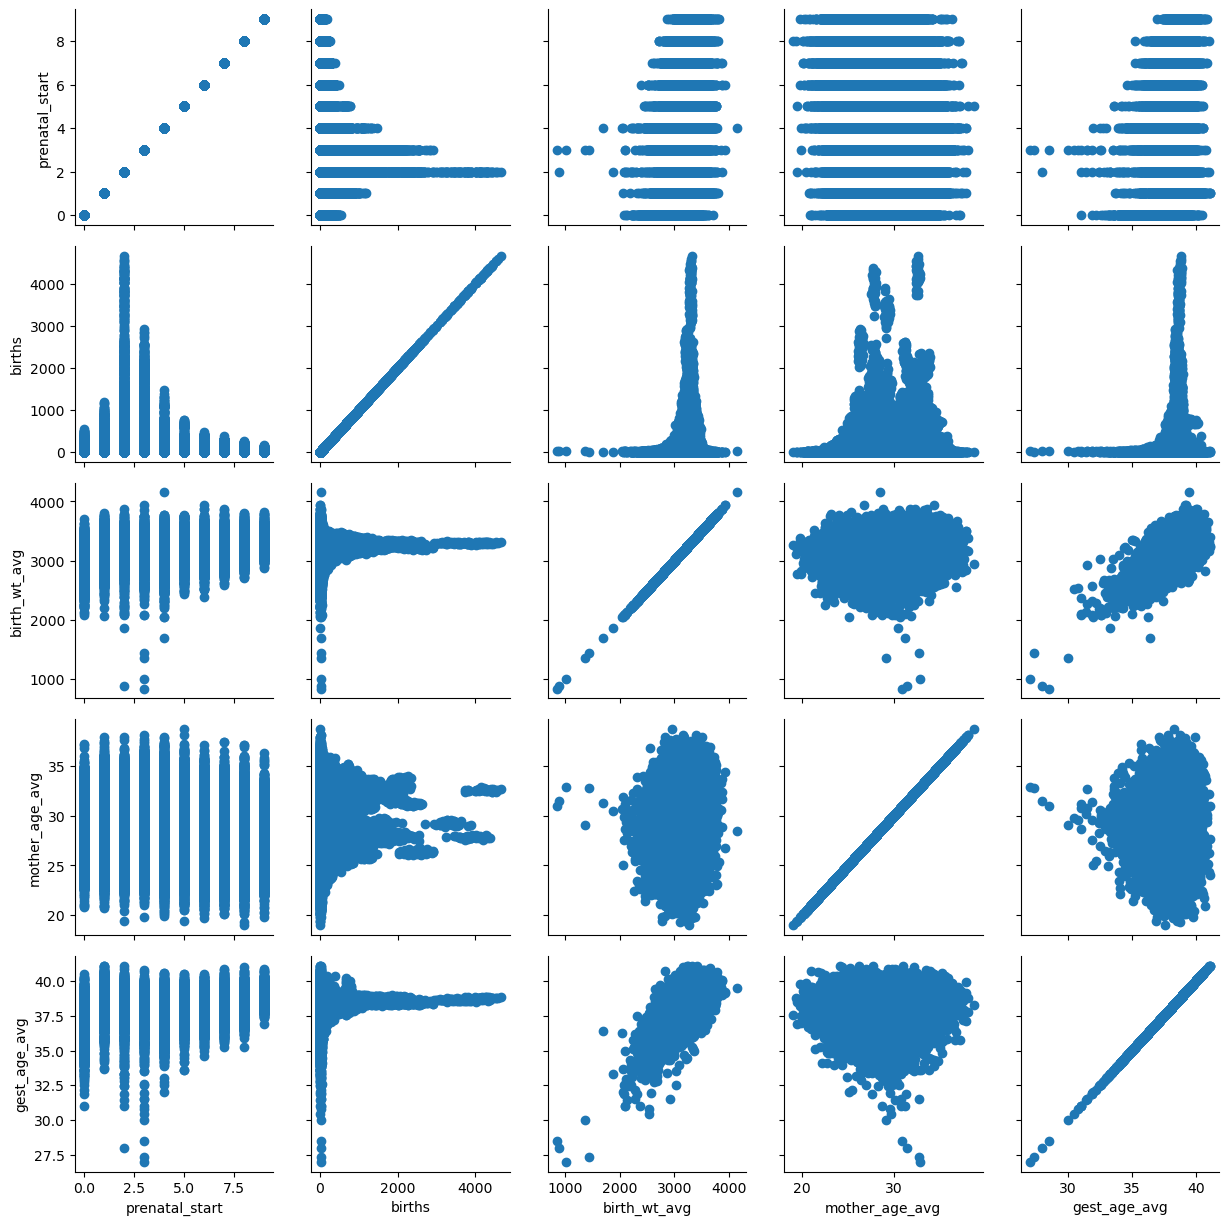

In [68]:
# Then you map to the grid
g = sns.PairGrid(sub)
g.map(plt.scatter)

#### The most important relationships to explore after viewing the pairplot is mother age and birth weight and mother age and gestational age. The relationship here does not seem categorical like the structured plots, but does not have a linear relationship either. I would also like to explore many of the relationships that have a structured appearance with several vertical or horizontal lines just to see how the information is categorized. In summary, I think the mother's age may have more impact on birth weight and gestational age than previously thought. Original thoughts were that level of prenatal care would have more of an impact on gestational age and birth weight. 

In [90]:
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairwise_gen.png'), bbox_inches='tight')

In [91]:
df_natality.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_natality_prenatal_col.pkl'))